In [1]:
# Importing Packages and Data
import pandas as pd
import numpy as np
import biogeme as biogeme
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
import biogeme.messaging as msg
from biogeme.expressions import Beta
from biogeme.expressions import (
    Beta,
    DefineVariable,
    bioDraws,
    PanelLikelihoodTrajectory,
    MonteCarlo,
    log,
    Derive,
    bioNormalCdf,
    Elem
)
import math
from datetime import datetime
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# Import psychometric variables
psych_vars = pd.read_csv('Data/psych_vars.csv')
psych_vars = psych_vars.dropna()


In [5]:

# rename columns
psych_vars.rename(columns={'q16':'socialnorm1', 'q17':'socialnorm2', 'q18':'socialnorm3', 'q19':'socialnorm4', 'q20':'socialnorm5', 'q21':'socialnorm6'}, inplace=True)
psych_vars.rename(columns={'q22': 'expectedperf1', 'q23': 'expectedperf2', 'q24': 'expectedperf3', 'q25': 'expectedperf4', 'q26': 'expectedperf5'}, inplace=True)
psych_vars.rename(columns={'q27': 'envbenefit1', 'q28': 'envbenefit2', 'q29': 'envbenefit3', 'q30': 'envbenefit4'}, inplace=True)
psych_vars.rename(columns={'q31': 'perceivedrisk1', 'q32': 'perceivedrisk2', 'q33': 'perceivedrisk3'}, inplace=True)
psych_vars.rename(columns={'q34': 'resideffects1', 'q35': 'resideffects2', 'q36': 'resideffects3', 'q37': 'resideffects4'}, inplace=True)
psych_vars.rename(columns={'q38': 'envvalues1', 'q39': 'envvalues2', 'q40': 'envvalues3', 'q41': 'envvalues4'}, inplace=True)
psych_vars.rename(columns={'q42': 'antimicro1', 'q43': 'antimicro2', 'q44': 'antimicro3'}, inplace=True)
psych_vars.rename(columns={'q45': 'intentiontouse1', 'q46': 'intentiontouse2', 'q47': 'intentiontouse3'}, inplace=True)

# convert likert scale responses into numerical values with 6 being "positive" and "1" being negative
# socialnorm1 --> "my family or friends think using bikesharing or scootershariing is a positive thing"
psych_vars.replace({'socialnorm1': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# socialnorm 2 --> "people important to me think that using bikesharing or scootersharing is a positive thing"
psych_vars.replace({'socialnorm2': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# socialnorm3 --> "in the near future more people in my city will use bikesharing or scootersharing"
psych_vars.replace({'socialnorm3': {'Considerably fewer': 1, 'Fewer': 2, 'Slightly fewer': 3, 'Slightly more': 4, 'More': 5, 'A lot more': 6}}, inplace=True)
# socialnorm4 --> "people who are important to me think that I should use bikesharing or scooter sharing"
psych_vars.replace({"socialnorm4": {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# socialnorm5 --> "it is a shame to use bikeshaing or scootersharing"
psych_vars.replace({'socialnorm5': {'Strongly agree': 1, 'Agree': 2, 'Slightly agree': 3, 'Slightly disagree': 4, 'Disagree': 5, 'Strongly disagree': 6}}, inplace=True)

## this one has a NaN
# socialnorm6 --> "the social media evaluates bikesharing or scootersharing negatively"
psych_vars.replace({'socialnorm6': {'Very negative': 1, 'Negative': 2, 'Somewhat negative': 3, 'Somewhat positive': 4, 'Positive': 5, 'Very positive': 6}}, inplace=True)

# expectedperf1 --> "shared micromobility is convenient"
psych_vars.replace({'expectedperf1': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# expected perf2 --> "shared micromobility is effective for my personal mobility"
psych_vars.replace({'expectedperf2': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# expectedperf3 --> "shared micromobility can help me reach my destination efficiently"
psych_vars.replace({'expectedperf3': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# expectedperf4 --> "there are enough shared bikes/scooters available whenever I want to use them"
psych_vars.replace({'expectedperf4': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# expectedperf5 --> "I can comfortably take rides on a shared bike or scooter for my daily business"
psych_vars.replace({'expectedperf5': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# envbenefit1 --> "using shared micromobility will help alleviate traffic congestion"
psych_vars.replace({'envbenefit1': {'Very unlikely': 1, 'Unlikely': 2, 'Slightly unlikely': 3, 'Slightly likely': 4, 'Likely': 5, 'Very likely': 6}}, inplace=True)
# envbenefit2 --> "using shared micromobility will reduce carbon emission and air pollution"
psych_vars.replace({'envbenefit2': {'Very unlikely': 1, 'Unlikely': 2, 'Slightly unlikely': 3, 'Slightly likely': 4, 'Likely': 5, 'Very likely': 6}}, inplace=True)
# envbenefit3 --> "using a shared bike or scooter fits my environmental concerns"
psych_vars.replace({'envbenefit3': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)

# envbenefit4 --> "shared micromobility has a positive impact on urban traffic"
##### CHECK THIS ONE (do answers make sense?), also has a NaN
psych_vars.replace({'envbenefit4': {'Significantly increase': 1, 'Increase': 2, 'Slightly increase': 3, 'Slightly decrease': 4, 'Decrease': 5, 'Significantly decrease': 6}}, inplace=True)

# perceivedrisk1 --> "I would feel safe riding a shared bike or scooter in traffic"
psych_vars.replace({'perceivedrisk1': {'Very unsafe': 1, 'Unsafe': 2, 'Somewhat unsafe': 3, 'Somewhat safe': 4, 'Safe': 5, 'Very safe': 6}}, inplace=True)
# perceivedSocialNorm2 --> "I think riding a shared bike or scooter is dangerous"
psych_vars.replace({'perceivedrisk2': {'Very dangerous': 1, 'Dangerous': 2, 'Somewhat dangerous': 3, 'Somewhat safe': 4, 'Safe': 5, 'Very safe': 6}}, inplace=True)
# perceivedrisk3 --> "I would feel nervous about having an accident when riding a shared bike or scooter"
psych_vars.replace({'perceivedrisk3': {'Strongly agree': 1, 'Agree': 2, 'Slightly agree': 3, 'Slightly disagree': 4, 'Disagree': 5, 'Strongly disagree': 6}}, inplace=True)

##### CHECK THIS ONE -- normalize?
# resideffects1 --> "I knew about bikesharing or scootersharing before"
psych_vars.replace({'resideffects1': {'No': 0, 'Yes': 1}}, inplace=True)

# resideffects2 --> "many people around me know about bikesharing or scootersharing"
psych_vars.replace({'resideffects2': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)

# resideffects3 --> "I have used bikesharing or scootersharing before"
psych_vars.replace({'resideffects3': {'No': 0, 'Yes': 1}}, inplace=True)

# resideffects4 --> "there are bikesharing or scootersharing available to me and I can use them regularly"
psych_vars.replace({'resideffects4': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# envvalues1 --> "I would like to do my part to reduce carbon emission and air pollution"
psych_vars.replace({'envvalues1': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# envvalues2 --> "I always consider how my transport choices affect the environment"
psych_vars.replace({'envvalues2': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# envvalues3 --> "I consider myself to be an environmentally conscious person"
psych_vars.replace({'envvalues3': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# envvalues4 --> "global warming is fake science"
psych_vars.replace({'envvalues4': {'Strongly agree': 1, 'Agree': 2, 'Slightly agree': 3, 'Slightly disagree': 4, 'Disagree': 5, 'Strongly disagree': 6}}, inplace=True)
# antimicro1 --> "shared micromobility is a very bad idea"
psych_vars.replace({'antimicro1': {'Strongly agree': 1, 'Agree': 2, 'Slightly agree': 3, 'Slightly disagree': 4, 'Disagree': 5, 'Strongly disagree': 6}}, inplace=True)
# antimicro2 --> "shared micromobility causes a lot of problems"
psych_vars.replace({'antimicro2': {'Strongly agree': 1, 'Agree': 2, 'Slightly agree': 3, 'Slightly disagree': 4, 'Disagree': 5, 'Strongly disagree': 6}}, inplace=True)
# antimicro3 --> "shared micromobility should not have existed in cities"
psych_vars.replace({'antimicro3': {'Strongly agree': 1, 'Agree': 2, 'Slightly agree': 3, 'Slightly disagree': 4, 'Disagree': 5, 'Strongly disagree': 6}}, inplace=True)
# intentiontouse1 --> "I'm willing to use bikesharing or scootersharing in the future"
psych_vars.replace({'intentiontouse1': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)
# intentiontouse2 --> "I would recommend friends and family to use bikesharing or scootersharing"

### naN in this one
psych_vars.replace({'intentiontouse2': {'Definetely would not': 1, 'Probably would not': 2, 'Maybe would not': 3, 'Maybe would': 4, 'Probably would': 5, 'Definetely would': 6}}, inplace=True)

# intentiontouse3 --> "I'm willing to use bikesharing or scootersharing on a regular basis"
psych_vars.replace({'intentiontouse3': {'Strongly disagree': 1, 'Disagree': 2, 'Slightly disagree': 3, 'Slightly agree': 4, 'Agree': 5, 'Strongly agree': 6}}, inplace=True)


In [7]:
# Import micromobility data
micro_pool_socio = pd.read_csv('Data/micro_pool_socio_bio2up.csv')
# Micromobility Trips 0-5 Miles
micro0to5 = (((
# 0-2 miles first choice
micro_pool_socio['scooter_av'] == 1) & (
    micro_pool_socio['dlbike_av'] == 1) & (
    micro_pool_socio['dkbike_av'] == 1) & (
    micro_pool_socio['car_av'] == 0) & (
    micro_pool_socio['transit_av'] == 0) & (
    micro_pool_socio['rd_av'] == 0) & (
    micro_pool_socio['walk_av'] == 0) & (
    micro_pool_socio['bike_av'] == 0) & (
    micro_pool_socio['sctransit_av'] == 0)) | ((
# 0-2 miles second choice
    # scooter_av == 1 & dlbike_av == 1 & everything else == 0
    micro_pool_socio['scooter_av'] == 1) & (
    micro_pool_socio['dlbike_av'] == 1) & (
    micro_pool_socio['dkbike_av'] == 0) & (
    micro_pool_socio['car_av'] == 0) & (
    micro_pool_socio['transit_av'] == 0) & (
    micro_pool_socio['rd_av'] == 0) & (
    micro_pool_socio['walk_av'] == 0) & (
    micro_pool_socio['bike_av'] == 0) & (
    micro_pool_socio['sctransit_av'] == 0)) | ((
    #'scooter'_av ==1 & 'dk_bike'_av == 1 & everything else == 0
    micro_pool_socio['scooter_av'] == 1) & (
    micro_pool_socio['dkbike_av'] == 1) & (
    micro_pool_socio['dlbike_av'] == 0) & (
    micro_pool_socio['car_av'] == 0) & (
    micro_pool_socio['transit_av'] == 0) & (
    micro_pool_socio['rd_av'] == 0) & (
    micro_pool_socio['walk_av'] == 0) & (
    micro_pool_socio['bike_av'] == 0) & (
    micro_pool_socio['sctransit_av'] == 0)) | ((
    #'dk_bike_av' == 1 & 'dl_bike_av' == 1 & everything else == 0
    micro_pool_socio['dkbike_av'] == 1) & (
    micro_pool_socio['dlbike_av'] == 1) & (
    micro_pool_socio['scooter_av'] == 0) & (
    micro_pool_socio['car_av'] == 0) & (
    micro_pool_socio['transit_av'] == 0) & (
    micro_pool_socio['rd_av'] == 0) & (
    micro_pool_socio['walk_av'] == 0) & (
    micro_pool_socio['bike_av'] == 0) & (
    micro_pool_socio['sctransit_av'] == 0
    )) | ((
# 2-5 miles
    micro_pool_socio['scooter_av'] == 1) & (
    micro_pool_socio['dlbike_av'] == 0) & (
    micro_pool_socio['dkbike_av'] == 0) & (
    micro_pool_socio['car_av'] == 0) & (
    micro_pool_socio['transit_av'] == 0) & (
    micro_pool_socio['rd_av'] == 0) & (
    micro_pool_socio['walk_av'] == 0) & (
    micro_pool_socio['bike_av'] == 0) & (
    micro_pool_socio['sctransit_av'] == 1
)))

micro_pool_socio_0_5 = micro_pool_socio.loc[micro0to5]

In [8]:
# Import scoot_user_id.csv
scoot_user_id = pd.read_csv('Data/scoot_user_id.csv')

In [ ]:
micro_pool_socio_0_5['unique_id'] = micro_pool_socio_0_5['p'].astype(str) + '_' + micro_pool_socio_0_5['dperson'].astype(str)
scoot_user_id['unique_id'] = scoot_user_id['p'].astype(str) + '_' + scoot_user_id['dperson'].astype(str)

In [ ]:
# merge micro_pool_socio and scooter_user_id
micro_pool_socio = pd.merge(micro_pool_socio_0_5, scoot_user_id, on='unique_id')
micro_pool_socio_0_5 = micro_pool_socio


In [10]:
# merge psych_vars and micro_pool_socio using inner join, thus dropping any users who did not answer psychometric questions
micro_psych = pd.merge(micro_pool_socio_0_5, psych_vars_with_factors, on='user', )

# get count of unique users in micro_psych
micro_psych['user'].nunique()

# sort by dperson
micro_psych = micro_psych.sort_values(by=['who'])

# drop user column b/c is it is type string
micro_psych = micro_psych.drop(columns=['user'])
micro_psych = micro_psych.drop(columns=['unique_id'])

# create new column called age_35_more
micro_psych['age_35_more'] = np.where(micro_psych['age'] >= 35, 1, 0)
# create new column for child > 0
micro_psych['have_children'] = np.where(micro_psych['child'] > 0, 1, 0)
# create new column for fulltime_employee where work = 1
micro_psych['fulltime_employee'] = np.where(micro_psych['work'] == 1, 1, 0)
# create new column for hh_income_75k where income >= 8
micro_psych['hh_income_75k'] = np.where(micro_psych['hhincome'] >= 8, 1, 0)

In [11]:

# convert to database
database = db.Database('micro_psych', micro_psych)

database.panel("who")


globals().update(database.variables)

In [14]:
import seaborn as sns

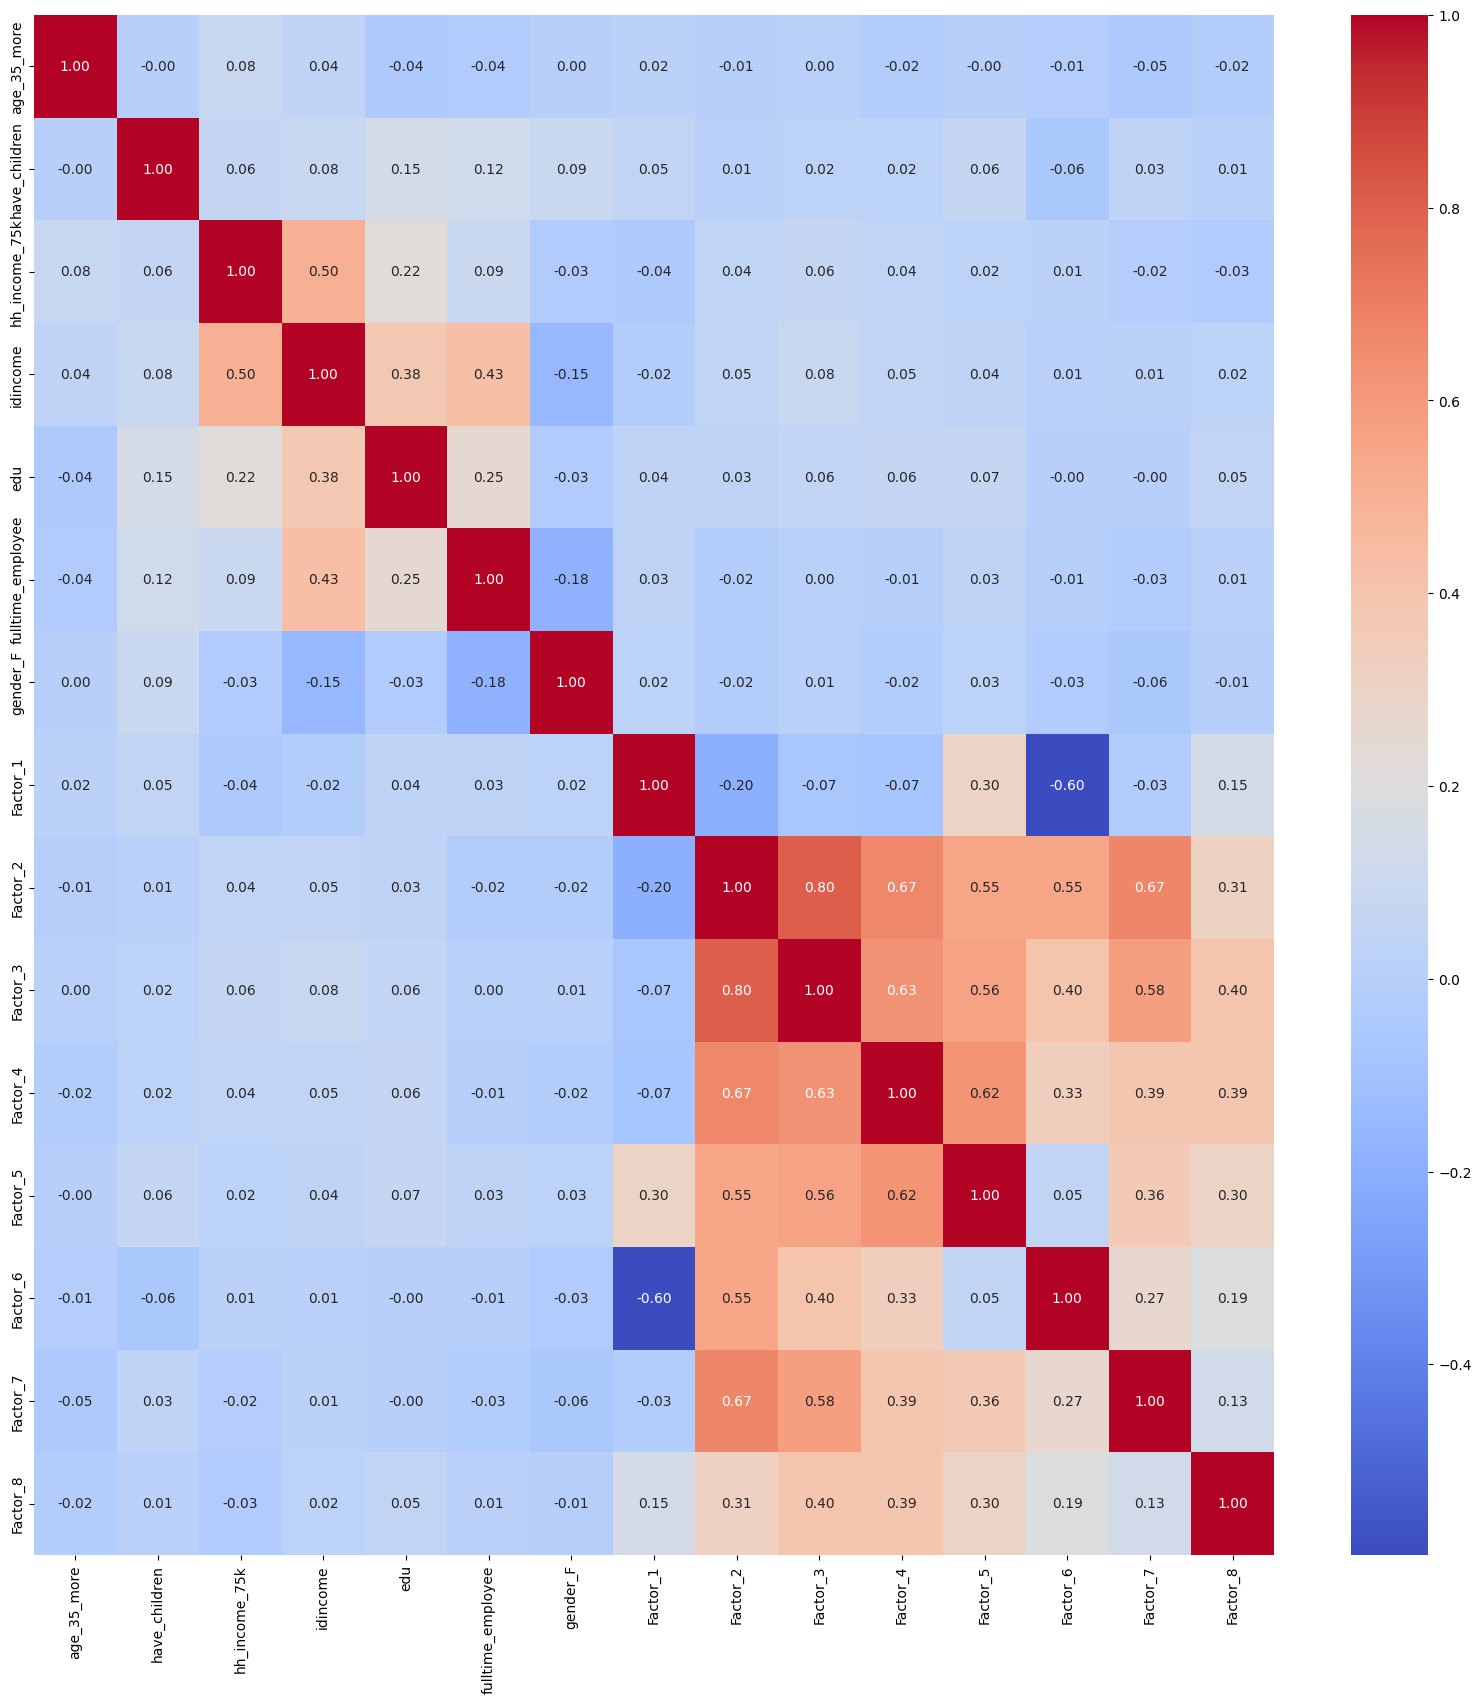

In [17]:
# create correlation matrix between socio-demographic variables (age, child, hhincome, idincome, edu, employ, higheredu, gender_F,  and factor scores (Factor_1, Factor_2, Factor_3, Factor_4, Factor_5, Factor_6, Factor_7, Factor_8)
# first create subset df with those variables
subset_df = micro_psych[['age_35_more', 'have_children', 'hh_income_75k', 'idincome', 'edu', 'fulltime_employee', 'gender_F', 'Factor_1', 'Factor_2', 'Factor_3', 'Factor_4', 'Factor_5', 'Factor_6', 'Factor_7', 'Factor_8']]
corr = subset_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [37]:
# Parameters to be estimated
intercept_risk = Beta('intercept_risk', 0, None, None, 0)
intercept_expectedperf = Beta('intercept_expectedperf', 0, None, None, 0)
intercept_intenttouse = Beta('intercept_intenttouse', 0, None, None, 0)
intercept_socialnorm = Beta('intercept_socialnorm', 0, None, None, 0)

coef_age_35_more_risk = Beta('coef_age_35_more_risk', 0, None, None, 0)
coef_age_35_more_expectedperf = Beta('coef_age_35_more_expectedperf', 0, None, None, 0)
coef_age_35_more_intenttouse = Beta('coef_age_35_more_intenttouse', 0, None, None, 0)
coef_age_35_more_socialnorm = Beta('coef_age_35_more_socialnorm', 0, None, None, 0)

coef_female_risk = Beta('coef_female_risk', 0, None, None, 0)
coef_female_socialnorm = Beta('coef_female_socialnorm', 0, None, None, 0)

coef_have_children_risk = Beta('coef_have_children_risk', 0, None, None, 0)
coef_have_children_expectedperf = Beta('coef_have_children_expectedperf', 0, None, None, 0)
coef_have_children_intenttouse = Beta('coef_have_children_intenttouse', 0, None, None, 0)
coef_have_children_socialnorm = Beta('coef_have_children_socialnorm', 0, None, None, 0)

coef_ownBike_risk = Beta('coef_ownBike_risk', 0, None, None, 0)
coef_ownBike_socialnorm = Beta('coef_ownBike_socialnorm', 0, None, None, 0)

coef_fulltime_employee_expectedperf = Beta('coef_fulltime_employee_expectedperf', 0, None, None, 0)
coef_fulltime_employee_intenttouse= Beta('coef_fulltime_employee_intenttouse', 0, None, None, 0)

coef_hh_income_75k_intenttouse = Beta('coef_hh_income_75k_intenttouse', 0, None, None, 0)
coef_bikelanepresent = Beta('coef_bikelanepresent', 0, None, None, 0)

omega_risk = bioDraws('err_c','NORMAL_HALTON3')
sigma_risk = Beta('sigma_err',1,None,None,0)

omega_socialnorm = bioDraws('err_c', 'NORMAL_HALTON3')
sigma_socialnorm = Beta('sigma_socialnorm', 1, None, None, 0)


In [38]:
# STRUCTURAL EQUATIONS

PERCEIVEDRISK = (
      intercept_risk
    + coef_age_35_more_risk * age_35_more
    + coef_have_children_risk * have_children
    + coef_ownBike_risk * bike
    + coef_female_risk * gender_F
    + sigma_risk * omega_risk
)

# EXPECTEDPERFORMANCE = (
#     intercept_expectedperf
#     + coef_age_35_more_expectedperf * age_35_more
#     + coef_have_children_expectedperf * have_children
#     + coef_fulltime_employee_expectedperf * fulltime_employee
# )
    
# INTENTIONTOUSE = (
#     intercept_intenttouse
#     + coef_hh_income_75k_intenttouse * hh_income_75k
#     + coef_have_children_intenttouse * have_children
#     + coef_fulltime_employee_intenttouse * fulltime_employee
# )

# SOCIALNORM = (
#       intercept_socialnorm
#     + coef_age_35_more_socialnorm * age_35_more
#     + coef_have_children_socialnorm * have_children
#     + coef_ownBike_socialnorm * bike
#     + coef_female_socialnorm * gender_F
#     + sigma_socialnorm * omega_socialnorm
# )
# RESIDUAL EFFECTS
# PERCEIVED RISK
# INTENTION TO USE
    


In [39]:
B_Risk01_F1 = Beta('B_Risk01_F1',-1,None,None,1)
B_Risk02_F1 = Beta('B_Risk02_F1',-1,None,None,0)
B_Risk03_F1 = Beta('B_Risk03_F1',-1,None,None,0)

INTER_Risk01 = Beta('INTER_Risk01',0,None,None,1)
INTER_Risk02 = Beta('INTER_Risk02',0,None,None,0)
INTER_Risk03 = Beta('INTER_Risk03',0,None,None,0)

MODEL_Risk01 = INTER_Risk01 + B_Risk01_F1 * PERCEIVEDRISK
MODEL_Risk02 = INTER_Risk02 + B_Risk02_F1 * PERCEIVEDRISK
MODEL_Risk03 = INTER_Risk03 + B_Risk03_F1 * PERCEIVEDRISK

SIGMA_STAR_Risk01 = Beta('SIGMA_STAR_Risk01',1,1.0e-5,None,1)
SIGMA_STAR_Risk02 = Beta('SIGMA_STAR_Risk02',1,1.0e-5,None,0)
SIGMA_STAR_Risk03 = Beta('SIGMA_STAR_Risk03',1,1.0e-5,None,0)

delta_1 = Beta('delta_1',0.1, 1.0e-5, None, 1)
delta_2 = Beta('delta_2',0.2,1.0e-5, None, 0)
tau_1 = -delta_1 - delta_2
tau_2 = -delta_1 
tau_3 = 0
tau_4 = delta_1
tau_5 = delta_1 + delta_2

Risk01_tau_1 = (tau_1-MODEL_Risk01)/SIGMA_STAR_Risk01
Risk01_tau_2 = (tau_2-MODEL_Risk01)/SIGMA_STAR_Risk01
Risk01_tau_3 = (tau_3-MODEL_Risk01)/SIGMA_STAR_Risk01
Risk01_tau_4 = (tau_4-MODEL_Risk01)/SIGMA_STAR_Risk01
Risk01_tau_5 = (tau_5-MODEL_Risk01)/SIGMA_STAR_Risk01

Risk02_tau_1 = (tau_1-MODEL_Risk02)/SIGMA_STAR_Risk02
Risk02_tau_2 = (tau_2-MODEL_Risk02)/SIGMA_STAR_Risk02
Risk02_tau_3 = (tau_3-MODEL_Risk02)/SIGMA_STAR_Risk02
Risk02_tau_4 = (tau_4-MODEL_Risk02)/SIGMA_STAR_Risk02
Risk02_tau_5 = (tau_5-MODEL_Risk02)/SIGMA_STAR_Risk02

Risk03_tau_1 = (tau_1-MODEL_Risk03)/SIGMA_STAR_Risk03
Risk03_tau_2 = (tau_2-MODEL_Risk03)/SIGMA_STAR_Risk03
Risk03_tau_3 = (tau_3-MODEL_Risk03)/SIGMA_STAR_Risk03
Risk03_tau_4 = (tau_4-MODEL_Risk03)/SIGMA_STAR_Risk03
Risk03_tau_5 = (tau_5-MODEL_Risk03)/SIGMA_STAR_Risk03

# Likert scale with M = 6 measurements
IndRisk01 = {
    1: bioNormalCdf(Risk01_tau_1),
    2: bioNormalCdf(Risk01_tau_2)-bioNormalCdf(Risk01_tau_1),
    3: bioNormalCdf(Risk01_tau_3)-bioNormalCdf(Risk01_tau_2),
    4: bioNormalCdf(Risk01_tau_4)-bioNormalCdf(Risk01_tau_3),
    5: bioNormalCdf(Risk01_tau_5)-bioNormalCdf(Risk01_tau_4),
    6: 1-bioNormalCdf(Risk01_tau_5)
}
P_Risk01 = Elem(IndRisk01, perceivedrisk1)


IndRisk02 = {
    1: bioNormalCdf(Risk02_tau_1),
    2: bioNormalCdf(Risk02_tau_2)-bioNormalCdf(Risk02_tau_1),
    3: bioNormalCdf(Risk02_tau_3)-bioNormalCdf(Risk02_tau_2),
    4: bioNormalCdf(Risk02_tau_4)-bioNormalCdf(Risk02_tau_3),
    5: bioNormalCdf(Risk02_tau_5)-bioNormalCdf(Risk02_tau_4),
    6: 1-bioNormalCdf(Risk02_tau_5)
}
P_Risk02 = Elem(IndRisk02, perceivedrisk2)

IndRisk03 = {
    1: bioNormalCdf(Risk03_tau_1),
    2: bioNormalCdf(Risk03_tau_2)-bioNormalCdf(Risk03_tau_1),
    3: bioNormalCdf(Risk03_tau_3)-bioNormalCdf(Risk03_tau_2),
    4: bioNormalCdf(Risk03_tau_4)-bioNormalCdf(Risk03_tau_3),
    5: bioNormalCdf(Risk03_tau_5)-bioNormalCdf(Risk03_tau_4),
    6: 1-bioNormalCdf(Risk03_tau_5)
}
P_Risk03 = Elem(IndRisk03, perceivedrisk3) 


In [40]:
# B_SocialNorm01_F1 = Beta('B_SocialNorm01_F1', -1, None, None, 1)
# B_SocialNorm02_F1 = Beta('B_SocialNorm02_F1', -1, None, None, 0)
# B_SocialNorm03_F1 = Beta('B_SocialNorm03_F1', -1, None, None, 0)
# B_SocialNorm04_F1 = Beta('B_SocialNorm04_F1', -1, None, None, 0)
# B_SocialNorm05_F1 = Beta('B_SocialNorm05_F1', -1, None, None, 0)

# INTER_SocialNorm01 = Beta('INTER_SocialNorm01', 0, None, None, 1)
# INTER_SocialNorm02 = Beta('INTER_SocialNorm02', 0, None, None, 0)
# INTER_SocialNorm03 = Beta('INTER_SocialNorm03', 0, None, None, 0)
# INTER_SocialNorm04 = Beta('INTER_SocialNorm04', 0, None, None, 0)
# INTER_SocialNorm05 = Beta('INTER_SocialNorm05', 0, None, None, 0)

# MODEL_SocialNorm01 = INTER_SocialNorm01 + B_SocialNorm01_F1 * SOCIALNORM
# MODEL_SocialNorm02 = INTER_SocialNorm02 + B_SocialNorm02_F1 * SOCIALNORM
# MODEL_SocialNorm03 = INTER_SocialNorm03 + B_SocialNorm03_F1 * SOCIALNORM
# MODEL_SocialNorm04 = INTER_SocialNorm04 + B_SocialNorm04_F1 * SOCIALNORM
# MODEL_SocialNorm05 = INTER_SocialNorm05 + B_SocialNorm05_F1 * SOCIALNORM

# SIGMA_STAR_SocialNorm01 = Beta('SIGMA_STAR_SocialNorm01', 1, 1.0e-5, None, 1)
# SIGMA_STAR_SocialNorm02 = Beta('SIGMA_STAR_SocialNorm02', 1, 1.0e-5, None, 0)
# SIGMA_STAR_SocialNorm03 = Beta('SIGMA_STAR_SocialNorm03', 1, 1.0e-5, None, 0)
# SIGMA_STAR_SocialNorm04 = Beta('SIGMA_STAR_SocialNorm04', 1, 1.0e-5, None, 0)
# SIGMA_STAR_SocialNorm05 = Beta('SIGMA_STAR_SocialNorm05', 1, 1.0e-5, None, 0)

# delta_1 = Beta('delta_1',0.1, 1.0e-5, None, 1)
# delta_2 = Beta('delta_2',0.2,1.0e-5, None, 0)
# tau_1 = -delta_1 - delta_2
# tau_2 = -delta_1 
# tau_3 = 0
# tau_4 = delta_1
# tau_5 = delta_1 + delta_2

# SocialNorm01_tau_1 = (tau_1 - MODEL_SocialNorm01) / SIGMA_STAR_SocialNorm01
# SocialNorm01_tau_2 = (tau_2 - MODEL_SocialNorm01) / SIGMA_STAR_SocialNorm01
# SocialNorm01_tau_3 = (tau_3 - MODEL_SocialNorm01) / SIGMA_STAR_SocialNorm01
# SocialNorm01_tau_4 = (tau_4 - MODEL_SocialNorm01) / SIGMA_STAR_SocialNorm01
# SocialNorm01_tau_5 = (tau_5 - MODEL_SocialNorm01) / SIGMA_STAR_SocialNorm01

# SocialNorm02_tau_1 = (tau_1 - MODEL_SocialNorm02) / SIGMA_STAR_SocialNorm02
# SocialNorm02_tau_2 = (tau_2 - MODEL_SocialNorm02) / SIGMA_STAR_SocialNorm02
# SocialNorm02_tau_3 = (tau_3 - MODEL_SocialNorm02) / SIGMA_STAR_SocialNorm02
# SocialNorm02_tau_4 = (tau_4 - MODEL_SocialNorm02) / SIGMA_STAR_SocialNorm02
# SocialNorm02_tau_5 = (tau_5 - MODEL_SocialNorm02) / SIGMA_STAR_SocialNorm02

# SocialNorm03_tau_1 = (tau_1 - MODEL_SocialNorm03) / SIGMA_STAR_SocialNorm03
# SocialNorm03_tau_2 = (tau_2 - MODEL_SocialNorm03) / SIGMA_STAR_SocialNorm03
# SocialNorm03_tau_3 = (tau_3 - MODEL_SocialNorm03) / SIGMA_STAR_SocialNorm03
# SocialNorm03_tau_4 = (tau_4 - MODEL_SocialNorm03) / SIGMA_STAR_SocialNorm03
# SocialNorm03_tau_5 = (tau_5 - MODEL_SocialNorm03) / SIGMA_STAR_SocialNorm03

# SocialNorm04_tau_1 = (tau_1 - MODEL_SocialNorm04) / SIGMA_STAR_SocialNorm04
# SocialNorm04_tau_2 = (tau_2 - MODEL_SocialNorm04) / SIGMA_STAR_SocialNorm04
# SocialNorm04_tau_3 = (tau_3 - MODEL_SocialNorm04) / SIGMA_STAR_SocialNorm04
# SocialNorm04_tau_4 = (tau_4 - MODEL_SocialNorm04) / SIGMA_STAR_SocialNorm04
# SocialNorm04_tau_5 = (tau_5 - MODEL_SocialNorm04) / SIGMA_STAR_SocialNorm04

# SocialNorm05_tau_1 = (tau_1 - MODEL_SocialNorm05) / SIGMA_STAR_SocialNorm05
# SocialNorm05_tau_2 = (tau_2 - MODEL_SocialNorm05) / SIGMA_STAR_SocialNorm05
# SocialNorm05_tau_3 = (tau_3 - MODEL_SocialNorm05) / SIGMA_STAR_SocialNorm05
# SocialNorm05_tau_4 = (tau_4 - MODEL_SocialNorm05) / SIGMA_STAR_SocialNorm05
# SocialNorm05_tau_5 = (tau_5 - MODEL_SocialNorm05) / SIGMA_STAR_SocialNorm05



# # Likert scale with M = 6 measurements
# IndSocialNorm01 = {
#     1: bioNormalCdf(SocialNorm01_tau_1),
#     2: bioNormalCdf(SocialNorm01_tau_2) - bioNormalCdf(SocialNorm01_tau_1),
#     3: bioNormalCdf(SocialNorm01_tau_3) - bioNormalCdf(SocialNorm01_tau_2),
#     4: bioNormalCdf(SocialNorm01_tau_4) - bioNormalCdf(SocialNorm01_tau_3),
#     5: bioNormalCdf(SocialNorm01_tau_5) - bioNormalCdf(SocialNorm01_tau_4),
#     6: 1 - bioNormalCdf(SocialNorm01_tau_5)
# }
# P_SocialNorm01 = Elem(IndSocialNorm01, socialnorm1)

# IndSocialNorm02 = {
#     1: bioNormalCdf(SocialNorm02_tau_1),
#     2: bioNormalCdf(SocialNorm02_tau_2) - bioNormalCdf(SocialNorm02_tau_1),
#     3: bioNormalCdf(SocialNorm02_tau_3) - bioNormalCdf(SocialNorm02_tau_2),
#     4: bioNormalCdf(SocialNorm02_tau_4) - bioNormalCdf(SocialNorm02_tau_3),
#     5: bioNormalCdf(SocialNorm02_tau_5) - bioNormalCdf(SocialNorm02_tau_4),
#     6: 1 - bioNormalCdf(SocialNorm02_tau_5)
# }
# P_SocialNorm02 = Elem(IndSocialNorm02, socialnorm2)

# IndSocialNorm03 = {
#     1: bioNormalCdf(SocialNorm03_tau_1),
#     2: bioNormalCdf(SocialNorm03_tau_2) - bioNormalCdf(SocialNorm03_tau_1),
#     3: bioNormalCdf(SocialNorm03_tau_3) - bioNormalCdf(SocialNorm03_tau_2),
#     4: bioNormalCdf(SocialNorm03_tau_4) - bioNormalCdf(SocialNorm03_tau_3),
#     5: bioNormalCdf(SocialNorm03_tau_5) - bioNormalCdf(SocialNorm03_tau_4),
#     6: 1 - bioNormalCdf(SocialNorm03_tau_5)
# }
# P_SocialNorm03 = Elem(IndSocialNorm03, socialnorm4)


In [41]:
ASC_SCOOTER = Beta('ASC_SCOOTER', 0, None, None, 1)
ASC_SCOOTER_S = Beta('ASC_SCOOTER_S', 1, None, None, 0)
ASC_SCOOTER_RND = ASC_SCOOTER + ASC_SCOOTER_S * bioDraws('ASC_SCOOTER_RND', 'NORMAL_ANTI')

ASC_DLBIKE = Beta('ASC_DLBIKE', 0, None, None, 0)
ASC_DLBIKE_S = Beta('ASC_DLBIKE_S', 1, None, None, 0)
ASC_DLBIKE_RND = ASC_DLBIKE + ASC_DLBIKE_S * bioDraws('ASC_DLBIKE_RND', 'NORMAL_ANTI')

ASC_DKBIKE = Beta('ASC_DKBIKE', 0, None, None, 0)
ASC_DKBIKE_S = Beta('ASC_DKBIKE_S', 1, None, None, 0)
ASC_DKBIKE_RND = ASC_DKBIKE + ASC_DKBIKE_S * bioDraws('ASC_DKBIKE_RND', 'NORMAL_ANTI')

ASC_SCTRANSIT = Beta('ASC_SCTRANSIT', 0, None, None, 0)
ASC_SCTRANSIT_S = Beta('ASC_SCTRANSIT_S', 1, None, None, 0)
ASC_SCTRANSIT_RND = ASC_SCTRANSIT + ASC_SCTRANSIT_S * bioDraws('ASC_SCTRANSIT_RND', 'NORMAL_ANTI')

B_SCOOTERTIME = Beta('B_SCOOTERTIME', 0, None, None, 0)
B_SCOOTERTIME_PRIME = Beta('B_SCOOTERTIME_PRIME', 0, None, None, 0)
B_BIKETIME = Beta('B_BIKETIME', 0, None, None, 0)
B_SCTRANSITTIME = Beta('B_SCTRANSITTIME', 0, None, None, 0)

B_ACCESS = Beta('B_ACCESS', 0, None, None, 0)
B_DROP =Beta('B_DROP', 0, None, None, 0)
B_WAITAV = Beta('B_WAITAV', 0, None, None, 0)
B_AV = Beta('B_AV', 0, None, None, 0)

B_COST = Beta('B_COST', 0, None, None, 0)
B_COST_PRIME = Beta('B_COST_PRIME', 0, None, None, 0)
B_costadj = Beta('B_costadj', 0, None, None, 0)

B_PRCP_Yes = Beta('B_PRCP_Yes', 0, None, None, 0)
B_OWNBIKE = Beta('B_OWNBIKE', 0, None, None, 0)
B_BIKELANE = Beta('B_BIKELANE', 0, None, None, 0)
B_AGE_SQ = Beta('B_AGE_SQ', 0, None, None, 0)
B_AGE_SCTRANSIT_SQ = Beta('B_AGE_SCTRANSIT_SQ', 0, None, None, 0)
B_GENDER_F = Beta('B_GENDER_F', 0, None, None, 0)

B_AGE_MORE_35 = Beta('B_AGE_MORE_35', 0, None, None, 0)
B_CHILD_IN_HH = Beta('B_CHILD_IN_HH', 0, None, None, 0)
B_IS_WHITE = Beta('B_IS_WHITE', 0, None, None, 0)
B_FULLTIME_EMPLOY = Beta('B_FULLTIME_EMPLOY', 0, None, None, 0)
B_HHINCOME_MORE_75k = Beta('B_HHINCOME_MORE_75k', 0, None, None, 0)

B_RISK_BIKE = Beta('B_RISK_BIKE', 0, None, None, 0)
B_RISK_SCTRANSIT = Beta('B_RISK_SCTRANSIT', 0, None, None, 0)

B_SOCIALNORM_BIKE = Beta('B_SOCIALNORM_BIKE', 0, None, None, 0)
B_SOCIALNORM_SCTRANSIT = Beta('B_SOCIALNORM_SCTRANSIT', 0, None, None, 0)

B_ANTIMICRO_FA1_BIKE = Beta('B_ANTIMICRO_FA1_BIKE', 0, None, None, 0)
B_ANTIMICRO_FA1_SCTRANSIT = Beta('B_ANTIMICRO_FA1_SCTRANSIT', 0, None, None, 0)

B_EXPECTEDPERF_INTENTTOUSE_BIKE = Beta("B_EXPECTEDPERF_INTENTTOUSE_BIKE", 0, None, None, 0)
B_EXPECTEDPERF_INTENTTOUSE_SCTRANSIT = Beta("B_EXPECTEDPERF_INTENTTOUSE_SCTRANSIT", 0, None, None, 0)

B_ENVVALUE_BIKE = Beta("B_ENVVALUE_BIKE", 0, None, None, 0)
B_ENVVALUE_SCTRANSIT = Beta('B_ENVVALUE_SCTRANSIT', 0, None, None, 0)

B_ENVBENEFIT_BIKE = Beta('B_ENVBENEFIT_BIKE', 0, None, None, 0)
B_ENVBENEFIT_SCTRANSIT = Beta("B_ENVBENEFIT_SCTRANSIT", 0, None, None, 0)

B_RESIDEFFECT_EXPECTEDPERF_BIKE = Beta('B_RESIDEFFECT_EXPECTEDPERF_BIKE', 0, None, None, 0)
B_RESIDEFFECT_EXPECTEDPERF_SCTRANSIT = Beta('B_RESIDEFFECT_EXPECTEDPERF_SCTRANSIT', 0, None, None, 0)

B_RESIDEFFECT_BIKE = Beta("B_RESIDEFFECT_BIKE", 0, None, None, 0)
B_RESIDEFFECT_SCTRANSIT = Beta('B_RESIDEFFECT_SCTRANSIT', 0 , None, None, 0)



In [42]:
V7 = (ASC_SCOOTER_RND
      + B_SCOOTERTIME*sctime
      + B_COST*sccost_adj
      + B_ACCESS*SCAW*(1-AVtech)
      + B_WAITAV*SCAV*AVtech
#     + ASC_SCOOTER_PRIME*AVtech
#     + B_SCOOTERTIME_PRIME*sctime*AVtech
#     + B_COST_PRIME*sccost_adj*AVtech
      )

V8 = (ASC_DLBIKE_RND
      + B_BIKETIME*dltime
      + B_COST*dlcost_adj
      + B_ACCESS*DLAW
      + B_RISK_BIKE*PERCEIVEDRISK
#     + B_ANTIMICRO_FA1_BIKE*Factor_1
#     + B_EXPECTEDPERF_INTENTTOUSE_BIKE*Factor_2
#     + B_SOCIALNORM_BIKE*Factor_3
#     + B_ENVVALUE_BIKE*Factor_4
#     + B_ENVBENEFIT_BIKE*Factor_5
#     + B_RESIDEFFECT_EXPECTEDPERF_BIKE*Factor_6
#     + B_RISK_BIKE*Factor_7
#     + B_RESIDEFFECT_BIKE*Factor_8
       
    )
V9 = (ASC_DKBIKE_RND 
      + B_BIKETIME*dbtime 
      + B_COST*dbcost_adj
      + B_ACCESS*DBAW
      + B_DROP*DBDW
      + B_RISK_BIKE*PERCEIVEDRISK
#     + B_SOCIALNORM_BIKE*SOCIALNORM
#     + B_ANTIMICRO_FA1_BIKE*Factor_1
#     + B_EXPECTEDPERF_INTENTTOUSE_BIKE*Factor_2
#     + B_SOCIALNORM_BIKE*Factor_3
#     + B_ENVVALUE_BIKE*Factor_4
#     + B_ENVBENEFIT_BIKE*Factor_5
#     + B_RESIDEFFECT_EXPECTEDPERF_BIKE*Factor_6
#     + B_RISK_BIKE*Factor_7
#     + B_RESIDEFFECT_BIKE*Factor_8
    )

V10 = (ASC_SCTRANSIT_RND
       + B_SCTRANSITTIME*sttotime
       + B_COST*sttocost_adj 
       + B_ACCESS*STAW*(1-AVtech)
       + B_WAITAV*STAV*AVtech 
       + B_RISK_SCTRANSIT*PERCEIVEDRISK
#     + B_SOCIALNORM_SCTRANSIT*SOCIALNORM
#     + B_ANTIMICRO_FA1_SCTRANSIT*Factor_1
#     + B_EXPECTEDPERF_INTENTTOUSE_SCTRANSIT*Factor_2
#     + B_SOCIALNORM_SCTRANSIT*Factor_3
#     + B_ENVVALUE_SCTRANSIT*Factor_4
#     + B_ENVBENEFIT_SCTRANSIT*Factor_5
#     + B_RESIDEFFECT_EXPECTEDPERF_SCTRANSIT*Factor_6
#     + B_RISK_SCTRANSIT*Factor_7
#     + B_RESIDEFFECT_SCTRANSIT*Factor_8
)

In [43]:
V = {7: V7, 8: V8, 9: V9, 10: V10}
av = {7: scooter_av, 8: dlbike_av, 9: dkbike_av, 10: sctransit_av}
      
condprob = models.logit(V, av, choice)
condlike = (
    P_Risk01 * 
    P_Risk02 * 
    P_Risk03 * 
    condprob
)

condlikeindiv = PanelLikelihoodTrajectory(condlike)
logprob = log(MonteCarlo(condlikeindiv))


the_biogeme = bio.BIOGEME(database, logprob, numberOfDraws=1000, numberOfThreads=100)
the_biogeme.modelName = "HybridChoice"

# Estimate the parameters
results = the_biogeme.estimate()
print(f"Estimated betas: {len(results.data.betaValues)}")
print(f"Final log likelihood: {results.data.logLike:.3f}")

C:\Users\rs49742\anaconda3\lib\site-packages\biogeme\algorithms.py:1969: RuntimeWarning: overflow encountered in double_scalars
  rho = num / denom


Estimated betas: 29
Final log likelihood: -29832.879


In [21]:
print(results)


Results for model HybridChoice
Output file (HTML):			HybridChoice~08.html
Nbr of parameters:		27
Sample size:			853
Observations:			4575
Excluded data:			0
Init log likelihood:		-39354.46
Final log likelihood:		-29829.55
Likelihood ratio test (init):		19049.81
Rho square (init):			0.242
Rho bar square (init):			0.241
Akaike Information Criterion:	59713.11
Bayesian Information Criterion:	59841.33
Final gradient norm:		6868.844
ASC_DKBIKE     : -0.695[0.262 -2.65 0.00804][0.281 -2.47 0.0134]
ASC_DKBIKE_S   : 1.43[0.134 10.7 0][0.164 8.7 0]
ASC_DLBIKE     : 0.289[0.239 1.21 0.226][0.265 1.09 0.276]
ASC_DLBIKE_S   : 0.424[0.341 1.24 0.214][0.568 0.747 0.455]
ASC_SCOOTER_S  : -1.89[0.129 -14.7 0][0.155 -12.2 0]
ASC_SCTRANSIT  : -1.68[0.441 -3.8 0.000144][0.473 -3.55 0.000385]
ASC_SCTRANSIT_S: -1.28[0.296 -4.31 1.61e-05][0.317 -4.04 5.44e-05]
B_ACCESS       : -0.174[0.0192 -9.09 0][0.0234 -7.45 9.59e-14]
B_BIKETIME     : -0.111[0.0303 -3.68 0.000236][0.0352 -3.16 0.00156]
B_COST         : -

In [22]:
pandasResults = results.getEstimatedParameters()
print(pandasResults.round(2))

                   Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_DKBIKE         -0.70          0.28        -2.47          0.01
ASC_DKBIKE_S        1.43          0.16         8.70          0.00
ASC_DLBIKE          0.29          0.26         1.09          0.28
ASC_DLBIKE_S        0.42          0.57         0.75          0.45
ASC_SCOOTER_S      -1.89          0.16       -12.17          0.00
ASC_SCTRANSIT      -1.68          0.47        -3.55          0.00
ASC_SCTRANSIT_S    -1.28          0.32        -4.04          0.00
B_ACCESS           -0.17          0.02        -7.45          0.00
B_BIKETIME         -0.11          0.04        -3.16          0.00
B_COST             -2.82          0.72        -3.93          0.00
B_DROP             -0.10          0.04        -2.51          0.01
B_RISK_BIKE        -0.19          0.36        -0.53          0.60
B_RISK_SCTRANSIT   -0.04          0.28        -0.12          0.90
B_Risk02_F1        -0.70          0.17        -4.10          0.00
B_Risk03_F

In [ ]:
nullloglikelihood = results.data.initLogLike
finalloglikelihood = results.data.logLike

print('Null log likelihood: ', nullloglikelihood)
print('Final log likelihood: ', finalloglikelihood)